# Data Set

To train this CNN I have used a database with more than 31,500 images from 45 classes and have variety to weather, location and distance. 
Publication of the database:  G. Cheng, J. Han, X. Lu. Remote Sensing Image Scene Classification: Benchmark and State of the Art. Proceedings of the IEEE.

### CODE

In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
import os
print(os.getcwd())  # 打印当前工作目录
print(os.listdir())  # 列出当前目录下的文件

D:\jack\cnn
['.idea', '.ipynb_checkpoints', 'Cloud detection -1207_03-restruct-CNN.ipynb', 'Cloud detection -1207_03-restruct-CNN.ipynb~', 'Cloud detection -restructded-CNN&ATT-Copy1.ipynb', 'Cloud detection -restructded-CNN&ATT.ipynb', 'CloudDetectionGUI.py', 'CloudDetectionGUIGrabCam.py', 'cloud_detection_gui-v1.py', 'cloud_detection_gui-v2.py', 'cloud_detection_gui-v3.py', 'F1-Score_a_plot.png', 'ISatelitales', 'modle-att-cnn-v1.h5', 'modle-att-cnn-v1.keras', 'modle-cnn-v1.h5', 'modle-cnn-v1.keras', 'precision_a_plot.png', 'recall_a_plot.png', 'specificity_a_plot.png']


In [3]:
import tensorflow as tf
print(tf.__file__)  

C:\Users\10600\.conda\envs\jack\lib\site-packages\tensorflow\__init__.py


In [4]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random
import pandas as pd

### 1. Import images



In [5]:
dirname = os.path.join(os.getcwd(), 'ISatelitales')
imgpath = dirname + os.sep # os.sep es = \

image = [] #list with images 
IdCategory = [] #1 is could,0 is no cloud
IdImage = [] #list of img index
indexImage = 0 #img index begin with 0


for ruta, carpetas, filenames in os.walk(imgpath): # path, folder and file names:

    print(ruta, indexImage)
    for filename in filenames: # looking at all files individually
            
        if ruta == imgpath +'cloud':  # if the image is in the cloud folder
            IdImage.append(indexImage) ; indexImage += 1
            IdCategory.append(1) # if the image have clouds IDcat value is 1
            filepath = os.path.join(ruta, filename) #obtain the image direction 
            imagen = plt.imread(filepath) #obtain the image array.
            image.append(imagen) #save the image in images list
        else: 
            IdImage.append(indexImage) ; indexImage += 1
            IdCategory.append(0) # if the image have clouds IDcat value is 0
            filepath = os.path.join(ruta, filename) #obtain the image direction 
            imagen = plt.imread(filepath) #obtain the image array.
            image.append(imagen) #save the image in images list
print('Total images: ', indexImage)
print('Cloud images: ', sum(IdCategory))

D:\jack\cnn\ISatelitales\ 0
D:\jack\cnn\ISatelitales\airplane 0
D:\jack\cnn\ISatelitales\airport 700
D:\jack\cnn\ISatelitales\baseball_diamond 1400
D:\jack\cnn\ISatelitales\basketball_court 2100
D:\jack\cnn\ISatelitales\beach 2800
D:\jack\cnn\ISatelitales\bridge 3500
D:\jack\cnn\ISatelitales\chaparral 4200
D:\jack\cnn\ISatelitales\church 4900
D:\jack\cnn\ISatelitales\circular_farmland 5600
D:\jack\cnn\ISatelitales\cloud 6300
D:\jack\cnn\ISatelitales\commercial_area 7000
D:\jack\cnn\ISatelitales\dense_residential 7700
D:\jack\cnn\ISatelitales\desert 8400
D:\jack\cnn\ISatelitales\forest 9100
D:\jack\cnn\ISatelitales\freeway 9800
D:\jack\cnn\ISatelitales\golf_course 10500
D:\jack\cnn\ISatelitales\ground_track_field 11200
D:\jack\cnn\ISatelitales\harbor 11900
D:\jack\cnn\ISatelitales\industrial_area 12600
D:\jack\cnn\ISatelitales\intersection 13300
D:\jack\cnn\ISatelitales\island 14000
D:\jack\cnn\ISatelitales\lake 14700
D:\jack\cnn\ISatelitales\meadow 15400
D:\jack\cnn\ISatelitales\medium

In [6]:
cat=IdCategory
imageList=image

### 2. Division of the set into subsets training, validation and testing
It is necessary to separate the dataset into 3 groups:
* Train: will be used to train the CNN, it is the largest subset, it is 49% of the total images.
* Test: Used to calculate the error when the CNN is being trained, it is 21% of the total images.
* Validation: Used to validate the test score after training the CNN with a new data set, it is 30% of the total images.

This dataset has 31500 images, but only 700 have clouds, 2.2%. We have an imbalanced dataset, training a CNN with this ratio is a mistake. For this reason it is necessary to modify the ratio in the trining, test and validation dataset. After many tests, the best ratios are:
25% of images with clouds and 75% of images without clouds.

* Train: 30% of images with clouds.
* Test: 50% of images with clouds.
* Validation: 25% of images with clouds.



Cloud-free images filtering function

In [7]:
def filter_proportion(data_set_cat, data_set_im, rat_accept):
    Cat = [] 
    Im = []
    con1= 0 #counter Cloud-free images
    con2= 0 #counter cloud images
    lim = len(data_set_cat)
    for i in range(lim) :
        if data_set_cat[i] == 0:
            R=random.random()
            if R < rat_accept:
                con1 += 1
                Im.append(data_set_im[i])
                Cat.append(data_set_cat[i])

        elif data_set_cat[i] == 1:
            con2 += 1
            Im.append(data_set_im[i])
            Cat.append(data_set_cat[i])


    Cat = np.array(Cat)
    Im = np.array(Im, dtype=np.uint8)
    print ('Ratio cloud images: ',con2/(con1+con2) * 100, '%')
    del data_set_im; del data_set_cat
    
    return Im, Cat
    

Separate the data set into data subsets

In [8]:
#subsets train-test and validation
all_Im, validation_Im_origin, all_Cat, validation_Cat_origin = train_test_split(imageList, cat, test_size=0.1, random_state = 18) 
del imageList; del cat

#subsets train test
train_Im_origin,test_Im_origin,train_Cat_origin,test_Cat_origin = train_test_split(all_Im, all_Cat, test_size=0.15, random_state = 18)
del all_Im; del all_Cat



In [9]:
#import keras
#from keras import optimizers
#from keras.utils import to_categorical

import tensorflow as tf
#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.set_visible_devices(physical_devices[0],'GPU')
from tensorflow import keras
from keras import optimizers
from keras.utils import to_categorical

from keras.models import Sequential,Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
#from keras.layers.normalization import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LeakyReLU
from keras.models import load_model

In [10]:
from keras.preprocessing.image import ImageDataGenerator
#from keras.src.legacy.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=20,  # 随机旋转的角度范围
    width_shift_range=0.2,  # 随机水平移动的范围
    height_shift_range=0.2,  # 随机垂直移动的范围
    shear_range=0.2,  # 剪切强度
    zoom_range=0.2,  # 随机缩放的范围
    horizontal_flip=True,  # 随机水平翻转
    fill_mode='nearest'
)

# 使用.flow_images()方法来增强图像

# Filtering unclouded images from subsets

Ratio cloud images:  31.46551724137931 %
232
2464


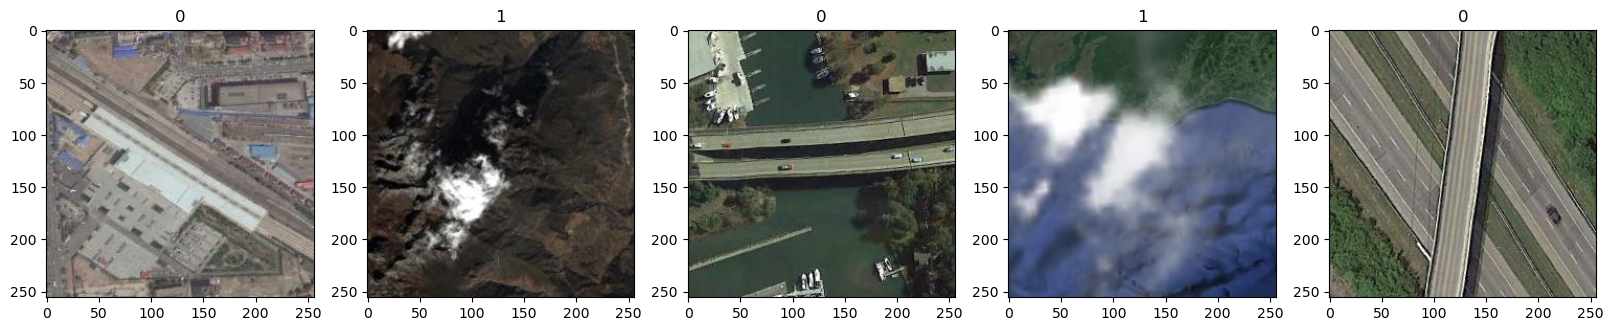

In [11]:
valIm, valCat = filter_proportion(validation_Cat_origin, validation_Im_origin, rat_accept=0.07)

plt.figure(figsize=(20,10))
col = 5
for i in range(col):
    plt.subplot(5//col+1,col,i+1)
    plt.imshow(valIm[i])
    plt.title(valCat[i])

print(len(valIm))
print(len(validation_Im_origin))

Ratio cloud images:  37.49124036440084 %
1427
18846


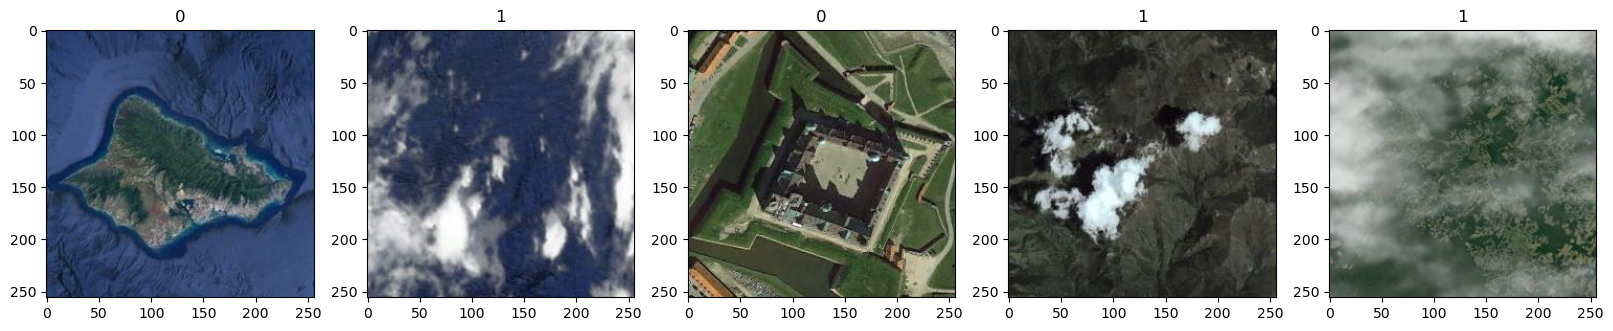

In [12]:
train_Im, train_Cat = filter_proportion(train_Cat_origin, train_Im_origin, rat_accept=0.05)

plt.figure(figsize=(20,10))
col = 5
for i in range(col):
    plt.subplot(5//col+1,col,i+1)
    plt.imshow(train_Im[i])
    plt.title(train_Cat[i])

print(len(train_Im))
print(len(train_Im_origin))

Ratio cloud images:  55.757575757575765 %
165
3326


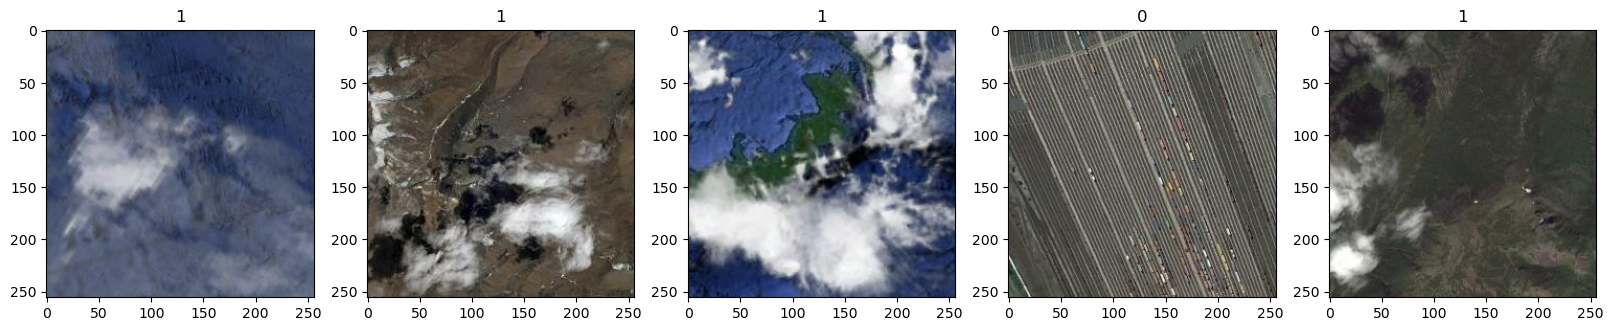

In [13]:
testIm, testCat = filter_proportion(test_Cat_origin, test_Im_origin, rat_accept=0.025)

plt.figure(figsize=(20,10))
col = 5
for i in range(col):
    plt.subplot(5//col+1,col,i+1)
    plt.imshow(testIm[i])
    plt.title(testCat[i])

print(len(testIm))
print(len(test_Im_origin))

### 3. Image processing

All images are the same size, so the only step will be to normalize the pixel value in the arrays. This step is necessary for the best performance of the CNN.

In [14]:
valIm = valIm / 255.
train_Im = train_Im / 255.
testIm = testIm / 255.

### 4. Develop the CNN

In [15]:
from keras.layers import Layer
import keras.backend as K
import tensorflow as tf

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', 
                                 shape=(input_shape[-1], 1),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(name='attention_bias',
                                 shape=(input_shape[1], 1),
                                 initializer='zeros',
                                 trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = tf.tanh(tf.matmul(x, self.W) + self.b)  # Change K.dot to tf.matmul
        a = tf.nn.softmax(e, axis=1)  # Change K.softmax to tf.nn.softmax
        output = x * a
        return output

    def compute_output_shape(self, input_shape):
        return input_shape

# Create the CNN structure

In [ ]:
import tensorflow as tf
from keras.metrics import Precision, Recall, AUC, PrecisionAtRecall


def precision(y_true, y_pred):
    
    y_pred = tf.clip_by_value(y_pred, 0, 1)
    y_true = tf.cast(y_true, tf.float32)  # Cast y_true to float32
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision_value = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision_value


def recall(y_true, y_pred):
    
    y_pred = tf.clip_by_value(y_pred, 0, 1)
    y_true = tf.cast(y_true, tf.float32)  # Cast y_true to float32
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall_value = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall_value


def f1_score(y_true, y_pred):
    precision_value = precision(y_true, y_pred)  # Rename the local variable to avoid conflict
    recall_value = recall(y_true, y_pred)
    return 2 * ((precision_value * recall_value) / (precision_value + recall_value + tf.keras.backend.epsilon()))


def specificity(y_true, y_pred):
    y_pred = tf.clip_by_value(y_pred, 0, 1)
    y_true = tf.cast(y_true, tf.float32)  # Cast y_true to float32
    true_negatives = tf.reduce_sum(tf.round(tf.clip_by_value((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = tf.reduce_sum(tf.round(tf.clip_by_value(1-y_true, 0, 1)))
    specificity_value = true_negatives / (possible_negatives + tf.keras.backend.epsilon())
    return specificity_value


In [ ]:
train_generator = datagen.flow(train_Im, train_Cat, batch_size=32)

In [ ]:
# 所有预训练模型都需要先做相应预处理（在数据生成器中实现）
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, EfficientNetB0, InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model


from tensorflow.keras.applications import (
    VGG16, ResNet50, InceptionV3, 
    EfficientNetB0, InceptionResNetV2  
)
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
# 共用参数
input_shape = (256, 256, 3)
num_classes = 1  # 二分类

# ===================== VGG16 =====================
def build_vgg():
    base = VGG16(weights='imagenet', 
                include_top=False, 
                input_shape=input_shape)
    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)
    model = Model(inputs=base.input, outputs=predictions)
    return model

# ===================== ResNet50 =====================
def build_resnet():
    base = ResNet50(weights='imagenet',
                   include_top=False,
                   input_shape=input_shape)
    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)
    model = Model(inputs=base.input, outputs=predictions)
    return model

# ===================== InceptionV3 =====================
def build_inception():
    base = InceptionV3(weights='imagenet',
                      include_top=False,
                      input_shape=input_shape)
    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)
    model = Model(inputs=base.input, outputs=predictions)
    return model

# ===================== EfficientNet =====================
def build_efficientnet():
    base = EfficientNetB0(weights='imagenet',
                         include_top=False,
                         input_shape=input_shape)
    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)
    model = Model(inputs=base.input, outputs=predictions)
    return model

# ===================== InceptionResNetV2 (类似GoogleNet) =====================
def build_inception_resnet():
    base = InceptionResNetV2(weights='imagenet',
                            include_top=False,
                            input_shape=input_shape)
    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)
    model = Model(inputs=base.input, outputs=predictions)
    return model

# 使用示例（以VGG16为例）
#modelCNN = build_vgg()

# 保持您的编译和训练参数不变
#modelCNN.compile(optimizer=...)
#model_jack1 = modelCNN.fit(...)

In [ ]:
modelVGG = build_vgg()

modelVGG.compile(optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc', precision, recall, f1_score, specificity])

model_vgg16 = modelVGG.fit(
    train_generator,
    steps_per_epoch=int(len(train_Im) / 32),  # Cast the result to an integer
    epochs=30,
    verbose=1,
    validation_data=(testIm, testCat),
    shuffle=True
)

In [ ]:
test_eval = modelVGG.evaluate(valIm, valCat, verbose=1) 
print('Validation loss:', test_eval[0])
print('Validation accuracy:', test_eval[1])

In [ ]:
modelResnet = build_resnet()

modelResnet.compile(optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc', precision, recall, f1_score, specificity])

model_resnet = modelResnet.fit(
    train_generator,
    steps_per_epoch=int(len(train_Im) / 32),  # Cast the result to an integer
    epochs=30,
    verbose=1,
    validation_data=(testIm, testCat),
    shuffle=True
)

In [ ]:
test_eval = modelResnet.evaluate(valIm, valCat, verbose=1) 
print('Validation loss:', test_eval[0])
print('Validation accuracy:', test_eval[1])

In [ ]:
modelInception = build_inception()

modelInception.compile(optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc', precision, recall, f1_score, specificity])

model_inception = modelInception.fit(
    train_generator,
    steps_per_epoch=int(len(train_Im) / 32),  # Cast the result to an integer
    epochs=30,
    verbose=1,
    validation_data=(testIm, testCat),
    shuffle=True
)

In [ ]:
test_eval = modelInception.evaluate(valIm, valCat, verbose=1) 
print('Validation loss:', test_eval[0])
print('Validation accuracy:', test_eval[1])

In [ ]:
modelEff = build_efficientnet()

modelEff.compile(optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc', precision, recall, f1_score, specificity])

model_efficientnet = modelEff.fit(
    train_generator,
    steps_per_epoch=int(len(train_Im) / 32),  # Cast the result to an integer
    epochs=30,
    verbose=1,
    validation_data=(testIm, testCat),
    shuffle=True
)

In [ ]:
test_eval = modelEff.evaluate(valIm, valCat, verbose=1) 
print('Validation loss:', test_eval[0])
print('Validation accuracy:', test_eval[1])

In [ ]:
modelGoogle = build_inception_resnet()

modelGoogle.compile(optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc', precision, recall, f1_score, specificity])

model_google = modelGoogle.fit(
    train_generator,
    steps_per_epoch=int(len(train_Im) / 32),  # Cast the result to an integer
    epochs=30,
    verbose=1,
    validation_data=(testIm, testCat),
    shuffle=True
)

In [ ]:
test_eval = modelGoogle.evaluate(valIm, valCat, verbose=1) 
print('Validation loss:', test_eval[0])
print('Validation accuracy:', test_eval[1])

In [16]:
'''
modelCNN = Sequential()
modelCNN.add(Conv2D(60, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))
modelCNN.add(MaxPooling2D((4, 4)))

modelCNN.add(Conv2D(120, (3, 3), activation='relu')) #padding default is valid
modelCNN.add(MaxPooling2D((2, 2)))

modelCNN.add(Dropout(0.5))
modelCNN.add(Conv2D(200, (3, 3), activation='relu'))
modelCNN.add(MaxPooling2D((2, 2)))
modelCNN.add(Conv2D(250, (3, 3), activation='relu'))

modelCNN.add(Dropout(0.5))
modelCNN.add(Flatten())
modelCNN.add(Dense(512, activation='relu'))
modelCNN.add(Dense(1, activation='sigmoid'))
'''

In [17]:
#modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 60)      1680      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 60)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 120)       64920     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 120)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 31, 31, 120)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 200)       2

### 5. Training the CNN

# save the model

### 6. CNN Evaluation
Test with validation Dataset

Represent how the loss value and acc value change with epoch

#Validation

Calculate the ROC curve values

Other evaluation values for the CNN. In this model the positive case is when it is an image with a cloud and the negative case is when it is an image without a cloud.

Some images that were not correctly predicted

In [34]:
###ATT-CNN
